In [85]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
# Logistic Regression
def logisticRegression(trainX, trainY, testX, testY, decision_boundary=0.5):
    '''
        @Input 
            trainX : type : array
            trainY : type : array
            testX : type : array
            decision_boundary : type : float
        @Output
            pred : type : array
    '''
    model = LogisticRegression(random_state=0).fit(trainX, trainY)
    pred_prob = model.predict_proba(testX)
    
    pred = np.array([], dtype=np.int32)
    
    for i in range(len(pred_prob)):
        if (pred_prob[i][1]>decision_boundary) == True:
            pred = np.append(pred, 1)
        else:
            pred = np.append(pred, 0)
            
    cofMat = confusion_matrix(testY, pred, labels=[1,0]) # 1: 불량, 0: 정상

    #calculate AUC of model
    auc = roc_auc_score(testY, pred)
    
    return({"pred_prob" : pred_prob[:,1], "pred" : pred, "confusionMatrix" : cofMat, "AucScore" : auc}) # type : int32

NameError: name 'LogisticRegression' is not defined

In [19]:
import os
os.getcwd()

'/workspace/xnsolution'

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('/workspace/xnsolution/data/사출6호기테스트.csv', encoding='euc-kr', header=None)

trainX = df.iloc[:,7:9]
trainY = df.iloc[:,0]
testX = df.iloc[:,7:9]
testY = df.iloc[:,0]

In [80]:
model = logisticRegression(trainX, trainY, testX, testY, decision_boundary=0.5)

In [88]:
model['pred_prob']

array([0.00039533, 0.00039533, 0.00039533, ..., 0.0006609 , 0.0006609 ,
       0.0006609 ])

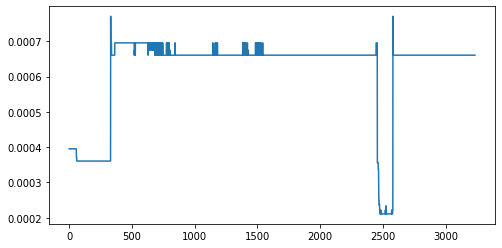

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(model['pred_prob'])
plt.show()